# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install haversine

In [ ]:
!pip install geo-py

     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for geo-py: filename=geo_py-0.4-cp36-cp36m-linux_x86_64.whl size=148502 sha256=ce4b219a8672682434dde7aa0a882ac5dc0fea1d7d6ccf9f84962ad8cc984e6e
  Stored in directory: /root/.cache/pip/wheels/39/13/da/f06054a2a14c9003cb02145928a5d51e46d0e38265420e877f
Successfully built geo-py


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import folium
import datetime as dt
from haversine import haversine#distance using (2d)
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NYC_Taxi_Data/Copy of NYC Taxi Data.csv")

In [ ]:
data.shape

(1458644, 11)

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
print(data.std())

vendor_id               0.498777
passenger_count         1.314242
pickup_longitude        0.070902
pickup_latitude         0.032881
dropoff_longitude       0.070643
dropoff_latitude        0.035891
trip_duration        5237.431724
dtype: float64


In [ ]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<h1>1) Column : vendor_id <br>

In [ ]:
data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


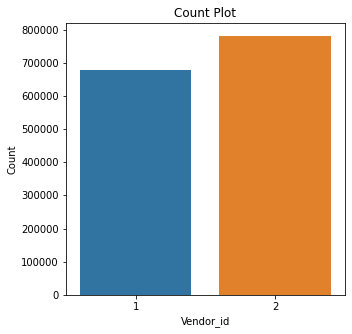

In [ ]:
plt.figure(figsize=(5,5))
ax_1= sns.countplot(data['vendor_id'])
ax_1.set_title("Count Plot")
ax_1.set_xlabel("Vendor_id")
ax_1.set_ylabel("Count")
plt.show()

**Observations:**

1.  From above plot it seems that vendor '2' is more preferable as compaired to vendor '1'.




<h1>2) Column : passenger_count <br>

In [ ]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


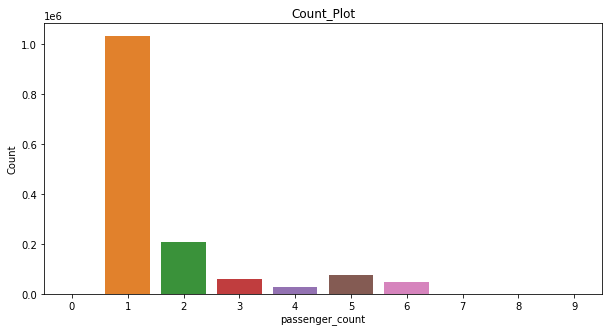

In [ ]:
plt.figure(figsize=(10,5))
ax_2 = sns.countplot(data['passenger_count'])
ax_2.set_xlabel("passenger_count")
ax_2.set_ylabel("Count")
ax_2.set_title('Count_Plot')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


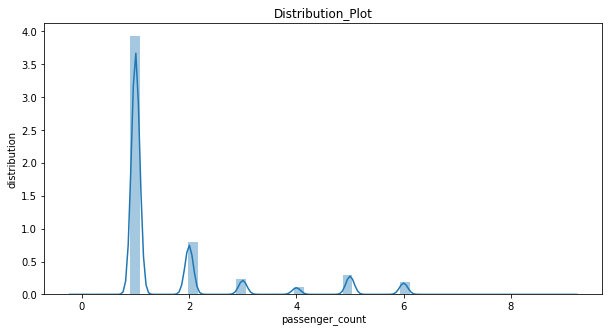

In [ ]:
plt.figure(figsize=(10,5))
ax_2 = sns.distplot(data['passenger_count'])
ax_2.set_xlabel("passenger_count")
ax_2.set_ylabel("distribution")
ax_2.set_title('Distribution_Plot')
plt.show()

**Observations:**

1. From above plot we can see that majority of cabs carray single passenger,follwed by 2 and 3 passenger.
2. lets check the boxplot and check the distribution of the passengers.



In [ ]:
data.passenger_count.describe()

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


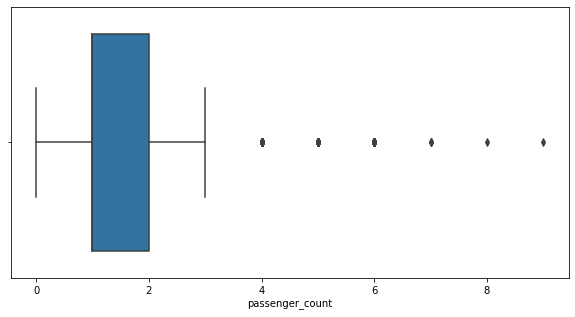

In [ ]:
plt.figure(figsize=(10,5))
ax_3 = sns.boxplot(data['passenger_count'])
plt.show()

**Observations:**

1. It seems that there are outliers.
2. 75th percentile shows that there are 2 passengers in the cab.
3. We can say that 90 percentage of data lies within 2 standard devation.



<h2>we will find out the Percentile range.<br>

In [ ]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
#Percentile = (number of people behind you*total number of people)/ 100
for i in range(0,100,10):
    var =data["passenger_count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 1
20 percentile value is 1
30 percentile value is 1
40 percentile value is 1
50 percentile value is 1
60 percentile value is 1
70 percentile value is 1
80 percentile value is 2
90 percentile value is 4
100 percentile value is  9


In [ ]:
#looking further from the 90-100th percecntile
#Percentile = (number of people behind you*total number of people)/ 100
for i in range(90,100):
    var =data["passenger_count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 4
91 percentile value is 4
92 percentile value is 5
93 percentile value is 5
94 percentile value is 5
95 percentile value is 5
96 percentile value is 5
97 percentile value is 6
98 percentile value is 6
99 percentile value is 6
100 percentile value is  9


In [ ]:
#looking further from 99.0 to 100th percecntile
#Percentile = (number of people behind you*total number of people)/ 100
for i in np.arange(0.0, 1.0, 0.1):
    var =data["passenger_count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

99.0 percentile value is 0
99.1 percentile value is 1
99.2 percentile value is 1
99.3 percentile value is 1
99.4 percentile value is 1
99.5 percentile value is 1
99.6 percentile value is 1
99.7 percentile value is 1
99.8 percentile value is 1
99.9 percentile value is 1
100 percentile value is  9


**Observations:**


1. At 90th percentile we are having 4 people.<br>
2. We can see from percentile analysis that 99 percentage of passenger falls below 6 'passenger_count'.<br>
3. 0.1 percentage of times there are 9 passengers.<br>
4. 90 percentage of data is covered wtih 4 passengers.



<h1>Dealing with outliers:<br>
<h3>we will remove outliers: will keep passengers more then 0 an d less then 5.<br>

In [ ]:
#Only keep trips with passengers more then 0 and less then 5.
data = data[(data.passenger_count > 0) & (data.passenger_count<=5)]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


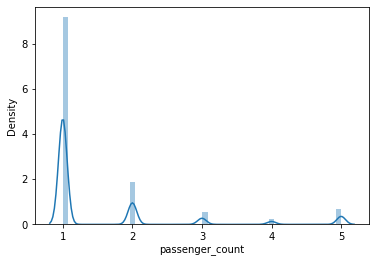

In [ ]:
sns.distplot(data.passenger_count)

<h1>3) Column : pickup_longitude and pickup_latitude:<h1><br>
<h3>source:google:<br>
<h3>New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.<h3><br>

In [ ]:
outlier_location = data[((data.pickup_longitude<=-74.15))|(data.pickup_latitude<=40.5774)|\
                        (data.pickup_longitude>=-73.7004)|(data.pickup_latitude>=40.9176)]


In [ ]:
print("There are {} pickups which are outside the NY city.".format(outlier_location.size))

There are 5368 pickups which are outside the NY city.


In [ ]:
maps = folium.Map(location=[40.734695,-73.990372],tiles='Stamen Toner')

In [ ]:
#first 100 outlier
sample_location = outlier_location.head(100)
for i,j in sample_location.iterrows():
  if int(j['pickup_latitude'])!=0:
    folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(maps)
maps


**Observatios:**

1. We can see that most of the pickups are outside the boundry of NY.<br>

2. But most of the pickups are not far form the city this implies that there is an active customer base surrounding to NY city.<br>
3. but certainly there are some pickups which are fra away from NY. we will consider them as outliers.






In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

<h1>4) Column : dropoff_longitude and dropoff_latitude:<h1><br>

In [ ]:
dropoff_outlier_location = data[((data.dropoff_longitude<=-74.15))|(data.dropoff_latitude<=40.5774)|\
                        (data.dropoff_longitude>=-73.7004)|(data.dropoff_latitude>=40.9176)]

In [ ]:
print("There are {} dropoffs which are outside the NY city.".format(dropoff_outlier_location.size))

There are 47652 dropoffs which are outside the NY city.


In [ ]:
maps = folium.Map(location=[40.734695,-73.990372],tiles='Stamen Toner')

In [ ]:
#first 100 outlier
sample_location = dropoff_outlier_location.head(100)
for i,j in sample_location.iterrows():
  if int(j['pickup_latitude'])!=0:
    folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(maps)
maps

**Observation**

1.  We can see that most of the dropoff are in the NY city,this is intresting as most of the pickups are from outside the NY city compaired to dropoffs.<br>
2.  We can say that many travelers are trying to come to NY city rather going out side the city.
3. we will not remove this outliers. as they are many in numbers. we will consiced them in model building.<br>



<h1>Features Related to Longitude and Latitude.
Here we will derive features from longitude and lattitude.

In [ ]:
data['lat_diff'] = data['pickup_latitude'] - data['dropoff_latitude']
data['lon_diff'] = data['pickup_longitude'] - data['pickup_longitude']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


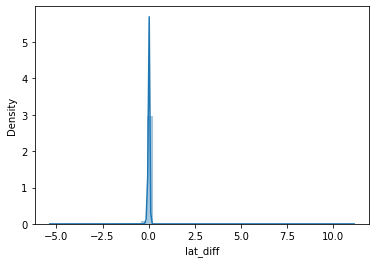

In [ ]:
sns.distplot(data['lat_diff'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


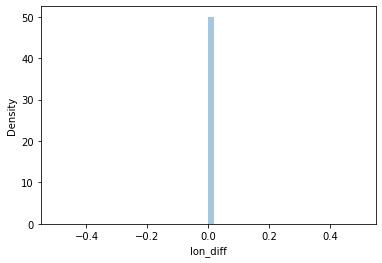

In [ ]:
sns.distplot(data['lon_diff'])

**Observations:**

1. Here we can say that most of the point are approximatly Normally distributed.



<h2>We can draw the feature form latitude and longitude, below feature is bearing feature.
Bearing can be defined as direction or an angle, between the north-south line of earth or meridian and the line connecting the target and the reference point. While Heading is an angle or direction where you are currently navigating in.  This means to reach a particular destination you need to adjust your heading direction with the bearing. Generally a ‘compass’ is an instrument, which gives you the direction information for navigation.<br>
lets take a Example:<br>
Formula:
Bearing from point A to B, can be calculated as,

β = atan2(X,Y),

where, X and Y are two quantities and can be calculated as:

X = cos θb * sin ∆L

Y = cos θa * sin θb – sin θa * cos θb * cos ∆L<br>
reference:
https://www.igismap.com/formula-to-find-bearing-or-heading-angle-between-two-points-latitude-longitude/



In [ ]:
def bearing_array(lat1, lng1, lat2, lng2):
  '''
  this function will take coordinate points and will convert into bearing i.e angle form point A to B.
  lat1, lng1, lat2, lng2 this are the latitude and longitude given in dataset.
  '''
  lng_delta_rad = np.radians(lng2 - lng1)#convert into radian(pi/180) chhange in longitude_2-longitude_1
  lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))#convert all degrees into radians
  x = np.sin(lng_delta_rad) * np.cos(lat2)#cal
  y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
  return np.degrees(np.arctan2(x,y))

In [ ]:
data['Bearing_direction'] = bearing_array(data['pickup_latitude'].values,data['pickup_longitude'].values,
                                      data['dropoff_latitude'].values, 
                                      data['dropoff_longitude'].values)

In [ ]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'lat_diff', 'lon_diff', 'Bearing_direction'],
      dtype='object')

<h1> 5) Column : trip_distance<br>

### This we can calculate using Haversin distance.<br>
Haversine Formula – Calculate geographic distance on earth. If you have two different latitude – longitude values of two different point on earth, then with the help of Haversine Formula, you can easily compute the great-circle distance (The shortest distance between two points on the surface of a Sphere). The term Haversine was coined by Prof. James Inman in 1835. Haversine is very popular and frequently used formula when developing a GIS (Geographic Information System) application or analyzing path and fields.<br>
https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula#:~:text=from%20math%20import%20cos%2C%20asin,*R*asin...

In [ ]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
#Calculate distance and assign new column to the dataframe.
data['trip_distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
data['trip_distance'].describe()

count    1.410246e+06
mean     3.442341e+00
std      4.310024e+00
min      0.000000e+00
25%      1.232286e+00
50%      2.094783e+00
75%      3.876292e+00
max      1.240910e+03
Name: trip_distance, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


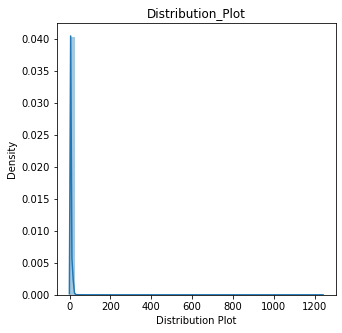

In [ ]:
plt.figure(figsize=(5,5))
ax_5 = sns.distplot(data["trip_distance"])
ax_5.set_xlabel("Distribution Plot")
ax_5.set_ylabel("Density")
ax_5.set_title("Distribution_Plot")
plt.show()

In [ ]:
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
data.drop(["trip_duration"],axis = 1)
train_y = data['log_trip_duration'].values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


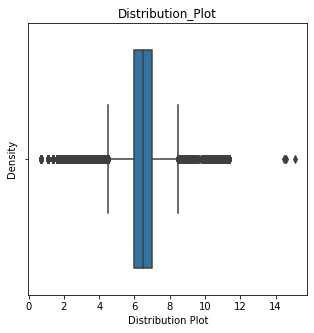

In [ ]:
plt.figure(figsize=(5,5))
ax_5 = sns.boxplot(data["log_trip_duration"])
ax_5.set_xlabel("Distribution Plot")
ax_5.set_ylabel("Density")
ax_5.set_title("Distribution_Plot")
plt.show()

In [ ]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
#Percentile = (number of people behind you*total number of people)/ 100
for i in range(0,100,10):
    var =data["log_trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.6931471805599453
10 percentile value is 5.5053315359323625
20 percentile value is 5.855071922202427
30 percentile value is 6.102558594613569
40 percentile value is 6.3080984415095305
50 percentile value is 6.4967749901858625
60 percentile value is 6.683360945766275
70 percentile value is 6.876264611890766
80 percentile value is 7.097548850614793
90 percentile value is 7.399398083331354
100 percentile value is  15.075754899638106


In [ ]:
#looking further from the 90-100th percecntile
#Percentile = (number of people behind you*total number of people)/ 100
for i in range(90,100):
    var =data["log_trip_duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 7.399398083331354
91 percentile value is 7.440733707389261
92 percentile value is 7.484930283289661
93 percentile value is 7.533693709848633
94 percentile value is 7.588829878307813
95 percentile value is 7.652070746116482
96 percentile value is 7.728855823852543
97 percentile value is 7.822845290279774
98 percentile value is 7.946971357693591
99 percentile value is 8.142063283104147
100 percentile value is  15.075754899638106


**Observations:**

1. 99 percentage of distance is between 0 to 8KM.
2. There are 10 percentage of values having less then 1 KM distance traveled.
2. from distribution plot its can be clerly seen.



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


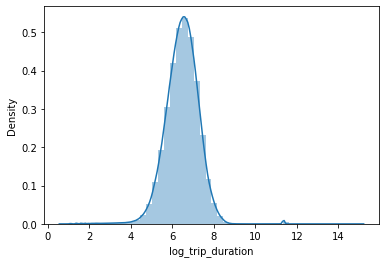

In [ ]:
sns.distplot(data['log_trip_duration'])

In [ ]:
print("Total {} number of trip duration grteter then 8 KM.".format((data['log_trip_duration'] > 12).sum()))

Total 4 number of trip duration grteter then 8 KM.


<h1>6) Column : Speed

In [ ]:
#Calculate Speed in km/h for further insights
data['speed'] = (data.trip_distance/(data.trip_duration/3600))
#we will just take a log transform of speed data.
data['log_speed'] = np.log(data['speed'].values + 1)

In [ ]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
#Percentile = (number of people behind you/total number of people) x 100
for i in range(0,100,10):
    var =data["speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 6.473536291768714
20 percentile value is 8.34759038310469
30 percentile value is 9.860640395534134
40 percentile value is 11.299834902359544
50 percentile value is 12.794668609463157
60 percentile value is 14.483754248411373
70 percentile value is 16.56252829485047
80 percentile value is 19.428174905603818
90 percentile value is 24.356352464961727
100 percentile value is  9274.849542192556


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


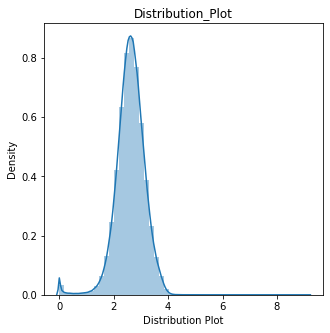

In [ ]:
plt.figure(figsize=(5,5))
ax_6 = sns.distplot(data["log_speed"])
ax_6.set_xlabel("Distribution Plot")
ax_6.set_ylabel("Density")
ax_6.set_title("Distribution_Plot")
plt.show()


<h1>7) Column : pickup_datetime & dropoff_datetime.

Reference:
https://pandas.pydata.org/pandas-docs/stable/reference/index.html

In [ ]:
#Convert timestamp to datetime format to fetch the other details as listed below
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
#https://stackoverflow.com/questions/60214194/error-in-reading-stock-data-datetimeproperties-object-has-no-attribute-week

data['day'] = data.pickup_datetime.dt.day
data['month'] = data.pickup_datetime.dt.month

data['pickup_hour'] = data.pickup_datetime.dt.hour
data['pickup_minute'] = data['pickup_datetime'].dt.minute
data['pickup_dt'] = (data['pickup_datetime'] - data['pickup_datetime'].min()).dt.total_seconds()

data['pickup_hour_weekofyear'] = data.pickup_datetime.dt.weekofyear

data['weekday_name'] = data.pickup_datetime.dt.day_name()
data['weekday'] = data.pickup_datetime.dt.weekday

data['pickup_minute'] = data.pickup_datetime.dt.minute

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


<h1>8) Column : month



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


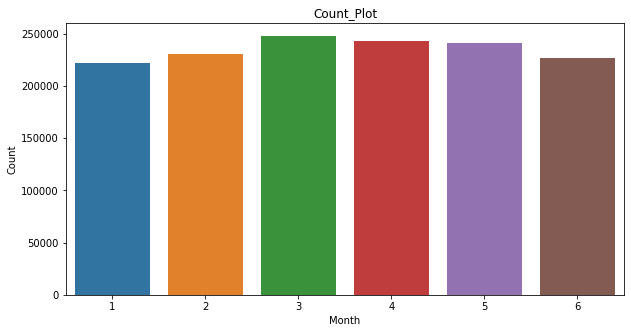

In [ ]:
plt.figure(figsize=(10,5))
ax_6 = sns.countplot(data['month'])
ax_6.set_xlabel("Month")
ax_6.set_ylabel("Count")
ax_6.set_title("Count_Plot")
plt.show()

**Obsevations:**

1. We can say that almost all months are having equal number of pickup count.




<h1> 9) Column : weekday_name

In [ ]:
data['weekday_name'].values

array(['Monday', 'Sunday', 'Tuesday', ..., 'Friday', 'Tuesday', 'Tuesday'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


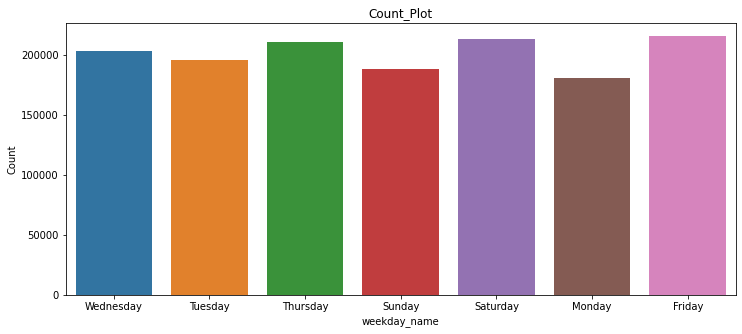

In [ ]:
plt.figure(figsize=(12,5))
ax_6 = sns.countplot(data['weekday_name'].sort_values(ascending = False))
ax_6.set_xlabel("weekday_name")
ax_6.set_ylabel("Count")
ax_6.set_title("Count_Plot")
plt.show()

<h1>

<h1> 10) Column : store_and_fwd_flag

In [ ]:
data.store_and_fwd_flag.value_counts()

N    1402204
Y       8042
Name: store_and_fwd_flag, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


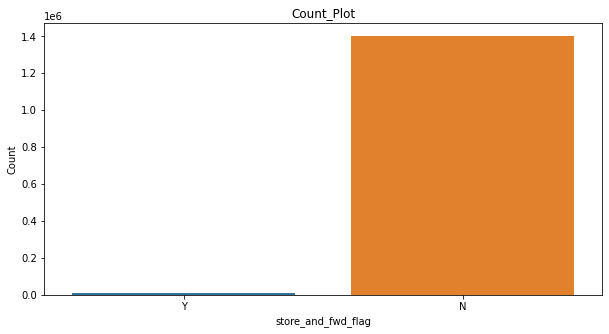

In [ ]:
plt.figure(figsize=(10,5))
ax_7 = sns.countplot(data['store_and_fwd_flag'].sort_values(ascending = False))
ax_7.set_xlabel("store_and_fwd_flag")
ax_7.set_ylabel("Count")
ax_7.set_title("Count_Plot")
plt.show()

**Observation:**

1. It seems that most of the booking are not entered by the driver.
2. we will convert it into numerical value.



In [ ]:
map_dict = {'N':0, 'Y':1}
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map(map_dict)

In [ ]:
len(data.columns)

26

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410246 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   id                      1410246 non-null  object        
 1   vendor_id               1410246 non-null  int64         
 2   pickup_datetime         1410246 non-null  datetime64[ns]
 3   dropoff_datetime        1410246 non-null  datetime64[ns]
 4   passenger_count         1410246 non-null  int64         
 5   pickup_longitude        1410246 non-null  float64       
 6   pickup_latitude         1410246 non-null  float64       
 7   dropoff_longitude       1410246 non-null  float64       
 8   dropoff_latitude        1410246 non-null  float64       
 9   store_and_fwd_flag      1410246 non-null  int64         
 10  trip_duration           1410246 non-null  int64         
 11  lat_diff                1410246 non-null  float64       
 12  lon_diff      

<h1>Baseline Modeling:<br>
<h2>Model_1 : Linear Regression.<br>

In [ ]:
# drop off the variables which are not needed #
cols_to_drop = ['id', 'pickup_datetime','weekday_name','speed']
train_id = data['id'].values
train_X = data.drop(cols_to_drop + ['dropoff_datetime', 'trip_duration', 'log_trip_duration'], axis=1)
train_y = data.log_trip_duration.values

In [ ]:
train_X.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'lat_diff', 'lon_diff', 'Bearing_direction', 'trip_distance',
       'log_speed', 'day', 'month', 'pickup_hour', 'pickup_minute',
       'pickup_dt', 'pickup_hour_weekofyear', 'weekday'],
      dtype='object')

In [ ]:
data.to_csv("data_from_eda.csv",index=False)

<h1>Train test split  :  we will split 70-30 train test respectively.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.30, random_state=42)

In [ ]:
Lr_regressor = LinearRegression().fit(X_train, y_train)
Lr_regressor.predict(X_test)

array([6.80321188, 5.86559397, 6.19606034, ..., 7.20172279, 6.57486797,
       6.08436858])

In [ ]:
print("The RMSE for Baseline Model is {}".format((np.sqrt(mean_squared_error( y_test, Lr_regressor.predict(X_test))))))

The RMSE for Baseline Model is 0.6794237904860152


**Observations:**

1.   With available features and some simple derived features we got RMSE of 0.6
2.   we will do Feature engineering and develop new set of features and also compaire base line model with other algorithms.



<h2>Model_2 : K- Neariest Neighbour with hyperparameter tunning.<br>
K-Hyper parameter.<br>

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
  K = K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K,n_jobs = -1)

  model.fit(X_train, y_train)  #fit the model
  pred=model.predict(X_test) #make prediction on test set
  error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.0888296981543353
RMSE value for k=  2 is: 0.9465900215781836
RMSE value for k=  3 is: 0.8948095831928351
RMSE value for k=  4 is: 0.8681019860764969
RMSE value for k=  5 is: 0.8514417454251868
RMSE value for k=  6 is: 0.8405726697627485
RMSE value for k=  7 is: 0.8323918135606119
RMSE value for k=  8 is: 0.8262679648980773
RMSE value for k=  9 is: 0.8213894356849222
RMSE value for k=  10 is: 0.8174587336005091


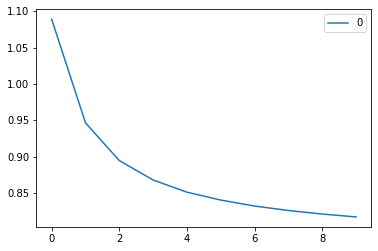

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

**Observations:**

1.  From the above plot it is clear that for k=8 we arre getting lowers RMSE value we will use it and retrain the model.



<h2>Model_3 : Random Forest regressor.

**Random Hyperparameter Grid**

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5,10,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }
               



**Random Search Training**

In [ ]:
start = datetime.now()
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
print("\nTime Taken: ",start - datetime.now())

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  6.1min finished



Time Taken:  -1 day, 23:49:58.724315


**best parameters**

In [ ]:
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 18}

**Evaluate Random Search**

In [ ]:
def evaluate(model, X_test, y_test):
  y_pred = model.predict(X_test)
  error = sqrt(mean_squared_error(y_test,y_pred))
  print('Model RMSE')
  print('RMSE {:0.4f} degrees.'.format(error))
  return error

## Random Forest without Hyperparameter tunning.

*   List item
*   List item



In [ ]:
#Random Forest without Hyperparameter tunning.
base_model = RandomForestRegressor(n_jobs=-1)
base_model.fit(X_train, y_train)
base_RMSE = evaluate(base_model, X_test, y_test)

Model RMSE
RMSE 0.0983 degrees.


## Random Forest with Hyperparameter tunning.


In [ ]:
best_random = rf_random.best_estimator_
best_RMSE = evaluate(best_random, X_test, y_test)

Model RMSE
RMSE 0.1105 degrees.


<h2>model_4 : XGB_Regressor:<br>

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
from datetime import datetime

<h1>Function to perform xgboost Regressor:<br>

In [ ]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

In [ ]:

# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results

<h1>Hyperparameter tunning with GridSearchCV:<br>

In [ ]:
start = datetime.now()
xgb = xgb.XGBRegressor(nthread=-1,objective ='reg:squarederror')
parameters = {'max_depth':[1,2,3],
            'learning_rate':[0.001,0.01,0.1],
            'n_estimators':[100,300,500,700]}

gscv  = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        n_jobs =-1,
                        verbose=1)

gscv_result = gscv.fit(X_train,y_train)

# Summarize results
print("Best: %f using %s" % (gscv_result.best_score_, gscv_result.best_params_))
means = gscv_result.cv_results_['mean_test_score']
stds = gscv_result.cv_results_['std_test_score']
params = gscv_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
print("\nTime Taken: ",start - datetime.now())



Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 111.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 185.6min finished


Best: 0.983196 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
-45.920109 (0.027503) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100}
-30.644894 (0.017320) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 300}
-20.399782 (0.010905) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500}
-13.525969 (0.006780) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 700}
-45.891896 (0.028328) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}
-30.571319 (0.018129) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 300}
-20.295342 (0.012024) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}
-13.402038 (0.007410) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 700}
-45.866379 (0.028435) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100}
-30.509115 (0.019240) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 300}
-20.207205 (0.01264

In [ ]:
first_xgb = xgb.XGBRegressor(max_depth=3,learning_rate = 0.1,n_estimators=700,n_jobs=-1,objective ='reg:squarederror')
first_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Training the model..
Done. Time taken : 0:14:17.364258

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  0.10323402686876977
MAPE :  0.45182768703187426


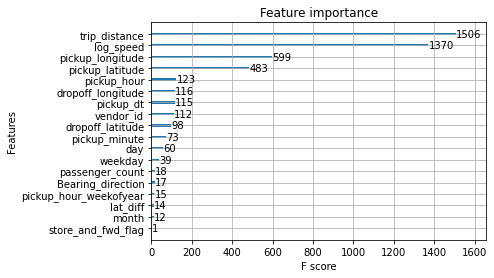

In [ ]:
%matplotlib inline
train_results, test_results = run_xgboost(first_xgb, X_train, y_train, X_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

In [ ]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = [ "Model",  "RMSE"]

x.add_row(["Linear Regression", 0.67942])
x.add_row(["KNeighborsRegressor with (K=8)",  0.82626])
x.add_row([" Random Forest regressor without hyperparamenter tunning", 0.53640])
x.add_row([" Random Forest regressor with tunned hyperparameter", 0.53640])
x.add_row(["XGB_Regressor with tunned hyperparameter ", 0.10323])
print(x)

+----------------------------------------------------------+---------+
|                          Model                           |   RMSE  |
+----------------------------------------------------------+---------+
|                    Linear Regression                     | 0.67942 |
|              KNeighborsRegressor with (K=8)              | 0.82626 |
|  Random Forest regressor without hyperparamenter tunning |  0.5364 |
|    Random Forest regressor with tunned hyperparameter    |  0.5364 |
|        XGB_Regressor with tunned hyperparameter          | 0.10323 |
+----------------------------------------------------------+---------+


<h1>***************************** Observations :*************************************


<h2>1. We have used baseline model as the basic model as initial referecne model.for this model we have got RMSE of 0.6794. by taking this as reference we mede further improvements.<br>

<h2>2. Next we tried with KNN Regressor for this 'K' is the hyper parameter we used Grid searchCV for hyper parameter tunning, and for k=8 we got RMSE of 0.8262.<br>

<h2>3. Further improving the model we perform the Random Forest regressor and here we simply used n_estimator=1000 and max_depth=2 we gor RMSE=0.5364.<br>

<h2>4. With GXboost regressor we performed GridsearchCV and with max_depth=3,learning_rate = 0.1,n_estimators=700 we got RMSE of 0.10323.<br>

<h1>***************************** Conclusion :************************************
<h2>From this we can say that there is significant improvement in XBgoost model and also as the more hyperparameter tuned model we take, the RMSE value improves.<br>